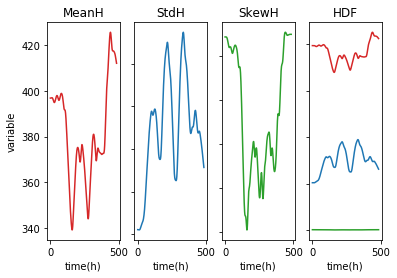

In [5]:
from pyomeca import Markers
import math
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np
from scipy.stats import skew 

data_path = "data.c3d"

def Average(lst): 
    return mean(lst)

def hdf_method():
    channels = ['LANK', 'RANK', 'LKNE', 'RKNE', 'LFIN', 'RFIN', 'LSHO', 'RSHO']
    markers = Markers.from_c3d(data_path, usecols=channels)
    
    #hd1 ankles
    hd1 = []
    hd1_x = 0
    #hd2 knees
    hd2 = []
    hd2_x = 0
    #hd3 wrists
    hd3 = []
    hd3_x = 0
    #hd4 shoulders
    hd4 = []
    hd4_x = 0
    
    #variables
    meanH = []
    stdH = []
    skewH = []
    HDF = [] 
    hdf = []
    time = []
    i = 0
    
    while i < 485:
    
        hd1_x = (markers[0][0][i] - markers[0][1][i]) ** 2
        hd1.append(math.sqrt(hd1_x))
        
        hd2_x = (markers[0][2][i] - markers[0][3][i]) ** 2
        hd2.append(math.sqrt(hd2_x))
        
        hd3_x = (markers[0][4][i] - markers[0][5][i]) ** 2
        hd3.append(math.sqrt(hd3_x))
        
        hd4_x = (markers[0][6][i] - markers[0][7][i]) ** 2
        hd4.append(math.sqrt(hd4_x))
        
        time.append(i)
        hdf = [hd1[i], hd2[i], hd3[i], hd4[i]]
        
        meanH.append(Average(hdf))
        stdH.append(np.std(hdf))
        skewH.append(skew(hdf))        
        HDF.append([meanH, stdH, skewH])
        
        i += 1
        
        return HDF, time
    
#     fig, axs = plt.subplots(1, 4)
#     axs[0].plot(time, meanH, 'tab:red')
#     axs[0].set_title('MeanH')
#     axs[1].plot(time, stdH, 'tab:blue')
#     axs[1].set_title('StdH')
#     axs[2].plot(time, skewH, 'tab:green')
#     axs[2].set_title('SkewH')
#     axs[3].plot(time, HDF[0][0], 'tab:red')
#     axs[3].plot(time, HDF[1][1], 'tab:blue')
#     axs[3].plot(time, HDF[2][2], 'tab:green')
#     axs[3].set_title('HDF')
    
#     for ax in axs.flat:
#         ax.set(xlabel='time(h)', ylabel='variable')
        
#     for ax in axs.flat:
#         ax.label_outer()

hdf_method()
